In [76]:
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.autowrap import ufuncify

sp.init_printing()

In [77]:
# Constants

k = sp.sympify('1.4')    # [-]      # Gas capacity ratio
R = sp.sympify('287.05') # [J/kg K] # Universal Gas Constant
Cp = R*k/(k-1)           # [J/kg K] # Const pressure Heat Capacity
Cv = R/(k-1)             # [J/kg K] # Const pressure Heat Capacity

In [78]:
# Sympy

# Mach Number
M = sp.Symbol('M', positive=True)

# Pressure relation
p = sp.Symbol('p', positive=True)
po = sp.Symbol('p_0', positive=True)

# Temperature relation
T = sp.Symbol('T', positive=True)
To = sp.Symbol('T_0', positive=True)

# Density relation
rho = sp.Symbol('\\rho', positive=True)
rhoo = sp.Symbol('\\rho_0', positive=True)

# Area relation
A = sp.Symbol('A', positive=True)
A_star = sp.Symbol('A_*', positive=True)

## Area relation
$$
\frac{A}{A^*} = {\left(\frac{\gamma+1}{2}\right)}^{-\frac{\gamma+1}{2\left(\gamma-1\right)}}
\frac{{\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{\gamma+1}{2(\gamma-1)}}}{M}
$$

In [80]:
term1 = ( (k+1)/2           )**( -(k+1)/(k-1)/2)
term2 = ( (1 + M*M*(k-1)/2) )**(  (k+1)/(k-1)/2)
isentropic_area_relation = sp.Eq(term1*term2/M, A/A_star)
isentropic_area_relation_inverse = sp.lambdify(A/A_star, sp.solve(isentropic_area_relation, M))

SyntaxError: invalid syntax (<lambdifygenerated-25>, line 1)

## Density relation
$$
\frac{\rho}{\rho_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{-1}{\gamma-1}}
$$

In [ ]:
isentropic_density_relation = sp.Eq(
    (1 + M*M*(k-1)/2)**(-1/(k-1)),
    rho/rhoo)
isentropic_density_relation_inverse = sp.lambdify(rho/rhoo, sp.solve( isentropic_density_relation, M)[0])

## Pressure relation
$$
\frac{p}{p_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{-\gamma}{\gamma-1}}
$$

In [ ]:
isentropic_pressure_relation = sp.Eq(
    (1 + M*M*(k-1)/2)**(-k/(k-1)), 
    p/po)
isentropic_pressure_relation_inverse = sp.lambdify(p/po, sp.solve( isentropic_pressure_relation, M)[0])

## Temperature relation
$$
\frac{T}{T_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{-1}
$$

In [ ]:
isentropic_temperature_relation = sp.Eq(
    (1 + M*M*(k-1)/2)**(-1),
    T/To)
isentropic_temperature_relation_inverse = sp.lambdify(T/To, sp.solve(isentropic_temperature_relation, M)[0])

In [81]:
# Create the function
cg_A_A_star = sp.lambdify(M,
                           sp.solve(isentropic_area_relation,
                                    A/A_star)[0],
                           modules=['numpy']) 
cg_rho_rhoo = sp.lambdify(M,
                           sp.solve(isentropic_density_relation,
                                    rho/rhoo)[0],
                           modules=['numpy'])   
cg_T_To = sp.lambdify(M,
                       sp.solve(isentropic_temperature_relation,
                                T/To)[0],
                       modules=['numpy'])  

cg_p_po = sp.lambdify(M,
                       sp.solve(isentropic_pressure_relation,
                                p/po)[0],
                       modules=['numpy'])  

interactive(children=(FloatSlider(value=3.25, continuous_update=False, description='M1', max=5.0, min=1e-05, s…

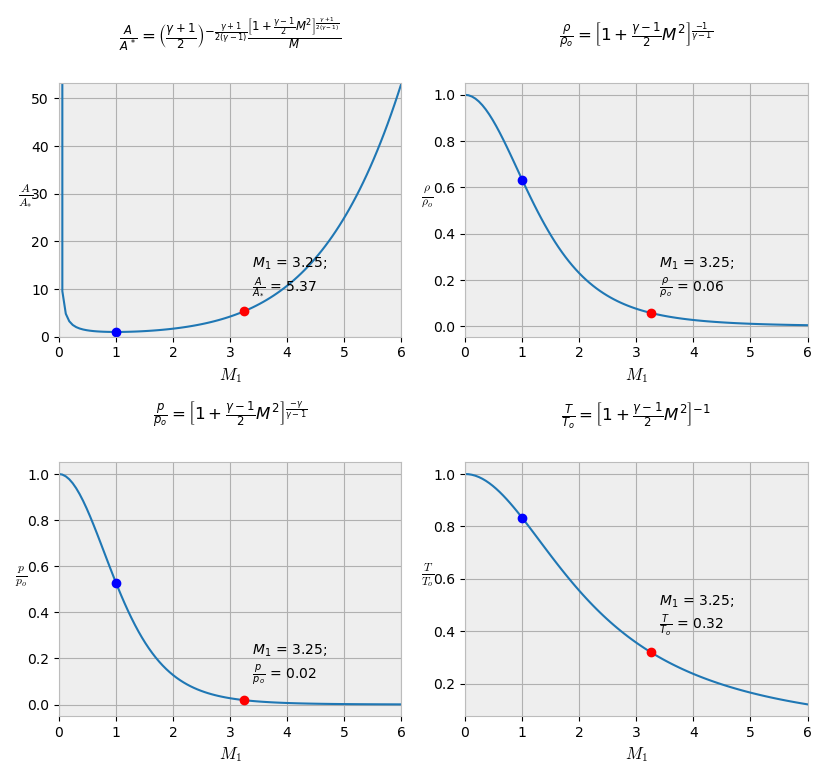

In [82]:
cg = widgets.Output()

M1_cg_slider = widgets.FloatSlider(
    value=3.25, min=0.00001, max=5.0, step=0.01,
    description='M1', disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True, readout_format='.2f')

with plt.style.context('bmh'):
    cg_fig, cg_axs = plt.subplots(nrows=2, ncols=2, figsize=(8.27, 11.69*2/3), dpi=100)   

@widgets.interact(M=M1_cg_slider)        
def plot_compressible_gas_relatiocg(M = 3.25):    
    
    # Give the axs easier names to remember
    cg_A_A_star_ax, cg_rho_rhoo_ax = cg_axs[0][0], cg_axs[0][1]
    cg_p_po_ax, cg_T_To_ax = cg_axs[1][0], cg_axs[1][1]                
        

    # Create the M1 range
    x_vals = np.linspace(0.00001, 6, 100)        

    for (ax,func,label,title) in zip([cg_A_A_star_ax, cg_rho_rhoo_ax, cg_p_po_ax, cg_T_To_ax],
                                     [cg_A_A_star, cg_rho_rhoo, cg_p_po, cg_T_To],
                                     [r"$\frac{A}{A_{*}}$", r"$\frac{\rho}{\rho_{o}}$",
                                      r"$\frac{p}{p_{o}}$", r"$\frac{T}{T_{o}}$"],
                                     [r"$\frac{A}{A^*} = {\left(\frac{\gamma+1}{2}\right)}^{-\frac{\gamma+1}{2\left(\gamma-1\right)}}\frac{{\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{\gamma+1}{2(\gamma-1)}}}{M}$",
                                      r"$\frac{\rho}{\rho_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{-1}{\gamma-1}}$",
                                      r"$\frac{p}{p_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{-\gamma}{\gamma-1}}$",
                                      r"$\frac{T}{T_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{-1}$"]):
        
        ax.cla() # Clear ax
        ax.plot(x_vals, func(x_vals), '-')
        ax.plot(1, func(1), 'bo') # Discontinuity
        ax.plot(M, func(M), 'ro') # Value under observation
        ax.annotate(f"  $M_1$ = {M:.2f};\n  {label} = {func(M):.2f}\n", (M, func(M))) # Text describing Value under observation

        ax.set_xlabel("$M_1$")
        ax.set_ylabel(label, rotation='horizontal')
        ax.set_title(title, pad=30)
        ax.set_xlim(left=0, right=6)
        ax.grid()
        
    cg_A_A_star_ax.set_ylim(bottom = 0, top=cg_A_A_star(6))        
    cg_fig.set_tight_layout(True)
        
plot_compressible_gas_relatiocg()
              

In [75]:
# Isentropic Flow Calculator

sp.nsolve((
    p/po - 0.5,
    isentropic_area_relation, 
    isentropic_density_relation,
    isentropic_pressure_relation,
    isentropic_temperature_relation),
    (M, p/po, T/To, rho/rhoo, A/A_star),
    (1, 0.8, 0.8, 0.8, 10), dict=True) 

ValueError: 
Can't calculate derivative wrt p/p_0.